# Оформление лабораторных работ с помощью matplotlib.

In [104]:
import matplotlib.pyplot as plt
import numpy as np

## Лабораторная работа №222. 

### Шаг №0: Предварительная оценка. 

Оценка  предельной частоты: $$ \nu_0 = \frac{1} {\pi \sqrt{LC}} = 38 кГц$$

Оценка согласнованной нагрузки $$ Z_n = \sqrt{\frac{L}{C}}\sec(\frac{\varphi}{2}) = 178Ом $$

### Шаг №1: Получение бегущей волны и измерение дисперсионной кривой. 

$y = y(\nu), y_0 = y_0(\nu)$ :

$-/-$  |  0кГц|  4кГц|  8кГц| 12кГц| 16кГц| 20кГц| 24кГц| 28кГц| 32кГц| 36кГц
-------|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:
$y_0$  |  0   |  0.8 |  1.4 |  1.9 |  2.5 |  3   |  3.1 |  3.4 |  2.8 |  1.5
$y$    | 3.2  |  3   |  3   |  3.1 |  3.2 |  3.2 |  3.2 |  3.5 |  3.5 |  3.7

**Выполнение необходимых расчётов и построение графика зависимости $\nu = \nu(\varphi)$**: 

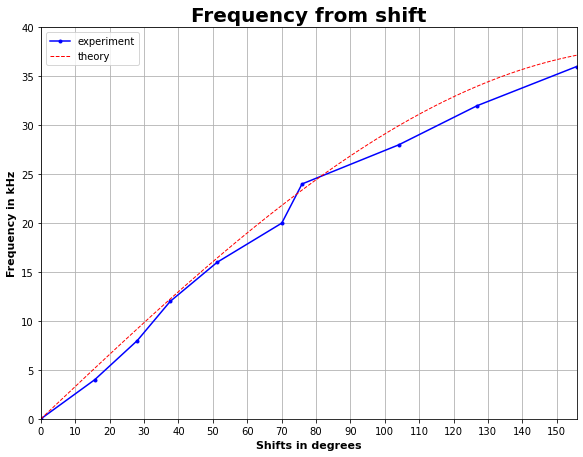

In [51]:
nu = np.linspace(0, 36, 10)

y_0 = np.array([0, 0.8, 1.4, 1.9, 2.5, 3, 3.1, 3.4, 2.8, 1.5], 
               dtype=np.float64)
y = np.array([3.2, 3, 3, 3.1, 3.2, 3.2, 3.2, 3.5, 3.5, 3.7],
            dtype=np.float64)

sins = np.around(y_0 / y, 2)

phi = np.around(np.arcsin(sins) / np.pi * 180, 2)
phi[7:] = (phi[7:] - 180) * (-1) 

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(phi, nu, color='b', marker='.', label='experiment')
ax.plot(np.linspace(0, 180, 10000), 
        38 * np.sin(np.linspace(0, 180, 10000) / 180 / 2 * np.pi), 
        color='r', linestyle='dashed', linewidth=1, label='theory')

ax.set_title('Frequency from shift', fontsize=20, fontweight='bold')
ax.set_xticks(np.linspace(0, 180, 19))
ax.set_xlabel('Shifts in degrees', fontsize=11, fontweight='bold')
ax.set_ylabel('Frequency in kHz', fontsize=11, fontweight='bold')
ax.set_xlim(0, np.max(phi))
ax.set_ylim(0, 40)

ax.legend()
ax.grid()

plt.show()

**Построение графика зависимости $\varphi = 2\arcsin(\frac{\nu}{\nu_0})$**:

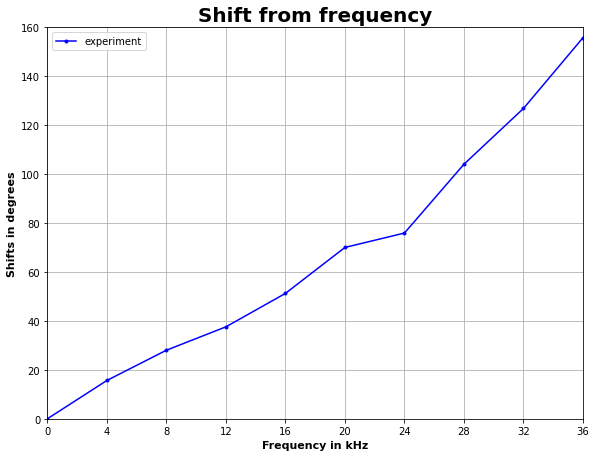

In [60]:
fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(nu, phi, color='b', marker='.', label='experiment')

ax.set_title('Shift from frequency', fontsize=20, fontweight='bold')
ax.set_xticks(np.linspace(0, 36, 10))
ax.set_xlabel('Frequency in kHz', fontsize=11, fontweight='bold')
ax.set_ylabel('Shifts in degrees', fontsize=11, fontweight='bold')
ax.set_xlim(0, np.max(nu))
ax.set_ylim(0, 160)

ax.legend()
ax.grid()

plt.show()

### Шаг №2. Исследование резонансов. 

**Таблица экспериментальных резонансов 2.1**: 

-/-       |   1     |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9      
---------:|:-------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:
$\omega_r$| 5.5кГЦ  | 10.5кГц| 16.5кГц| 21.3кГц|  26кГц |  29кГц | 32.5кГц| 34.5кГц|  37кГц

**Теоретический расчёт резонансов  $\omega_n = \frac{2}{\sqrt{LC}}\sin(\frac{m\pi}{N})$**:

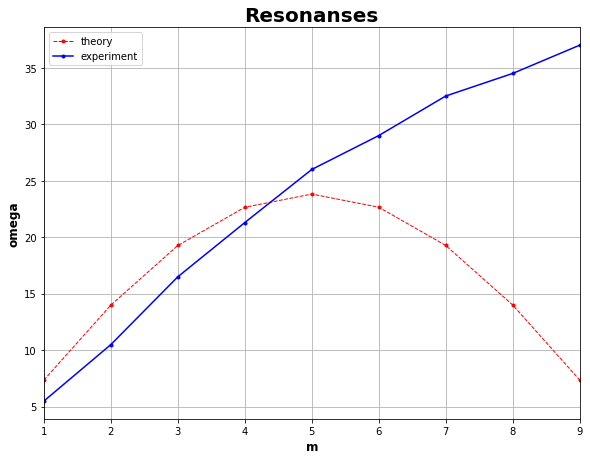

In [81]:
koef = np.around(2 / np.sqrt(4.7 * 1.5 / 1000), 2)

omegas = np.array([koef * np.sin(i * np.pi / 10) for i in range(1, 10)])
omegas_r = np.array([5.5, 10.5, 16.5, 21.3, 26, 29, 32.5, 34.5, 37])

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(np.linspace(1, 9, 9), omegas, color='r', marker='.', 
        linestyle='dashed', linewidth=1, label='theory')
ax.plot(np.linspace(1, 9, 9), omegas_r, color='b', marker='.',
        label='experiment')

ax.set_title('Resonanses', fontsize=20, fontweight='bold')
ax.set_xticks(np.linspace(0, 9, 10))
ax.set_xlabel('m', fontsize=12, fontweight='bold')
ax.set_xlim(1, 9)
ax.set_ylabel('omega', fontsize=12, fontweight='bold')

ax.legend()
ax.grid()

plt.show()

**Распределение напряжений вдоль цепи**:

klem  |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |  9   |  10  
-----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:
U     |  3   |  2.6 |  2.4 |  1.8 |  0.9 |  0.1 |  0.9 |  1.8 |  2.4 |  3

**Построение графика распределения напряжения**:

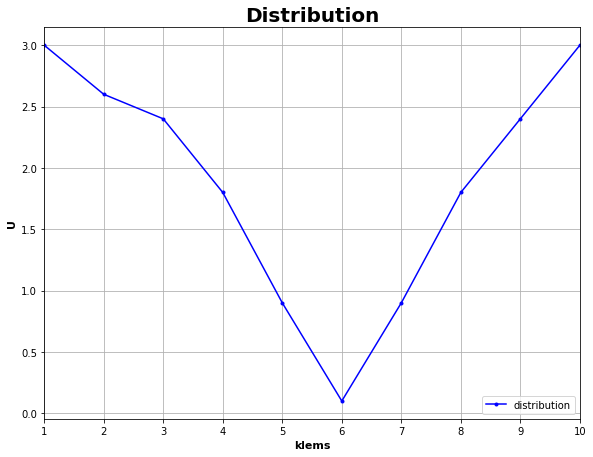

In [87]:
u = np.array([3, 2.6, 2.4, 1.8, 0.9, 0.1, 0.9, 1.8, 2.4, 3])
klem = np.linspace(1, 10, 10)

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(klem, u, color='b', marker='.', label='distribution')

ax.set_title('Distribution', fontsize=20, fontweight='bold')
ax.set_xlabel('klems', fontsize=11, fontweight='bold')
ax.set_xticks(klem)
ax.set_xlim(1, 10)
ax.set_ylabel('U', fontsize=11, fontweight='bold')

ax.legend(loc='lower right')
ax.grid()

plt.show()

$Q = \frac{\omega_r} {\omega_2 - \omega_1} = \frac{5.5}{6.5 - 5.15} = 4.1$

**Таблица экспериментальных резонансов 2.2**:

-/-       |   1     |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9      
---------:|:-------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:
$\omega_r$|  2.8кГЦ | 8.45кГц| 13.9кГц| 23.5кГц| 27.8кГц|  31кГц | 33.5кГц| 35.5кГц|  37кГц

**Теоретический расчёт резонансов  $\omega_n = \frac{2}{\sqrt{LC}}\sin(\frac{m\pi}{N})$**:

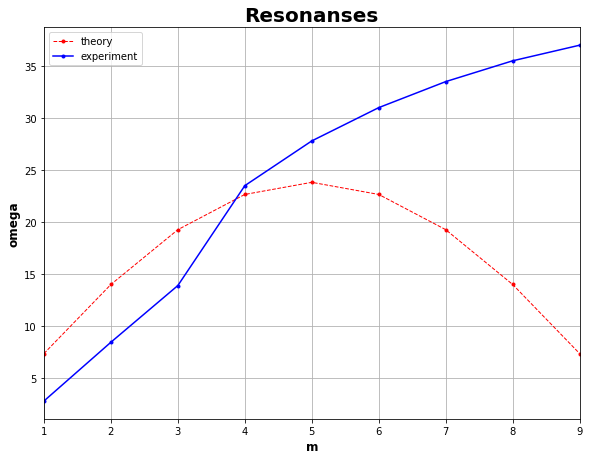

In [88]:
koef = np.around(2 / np.sqrt(4.7 * 1.5 / 1000), 2)

omegas = np.array([koef * np.sin(i * np.pi / 10) for i in range(1, 10)])
omegas_r = np.array([2.8, 8.45, 13.9, 23.5, 27.8, 31, 33.5, 35.5, 37])

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(np.linspace(1, 9, 9), omegas, color='r', marker='.', 
        linestyle='dashed', linewidth=1, label='theory')
ax.plot(np.linspace(1, 9, 9), omegas_r, color='b', marker='.',
        label='experiment')

ax.set_title('Resonanses', fontsize=20, fontweight='bold')
ax.set_xticks(np.linspace(0, 9, 10))
ax.set_xlabel('m', fontsize=12, fontweight='bold')
ax.set_xlim(1, 9)
ax.set_ylabel('omega', fontsize=12, fontweight='bold')

ax.legend()
ax.grid()

plt.show()

**Распределение напряжений вдоль цепи**:

klem  |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |  9   |  10  
-----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:
U     |  3   |  3   |  2.8 |  2.7 |  2.5 |  2.1 |  1.8 |  1.4 |  0.9 |  0.1

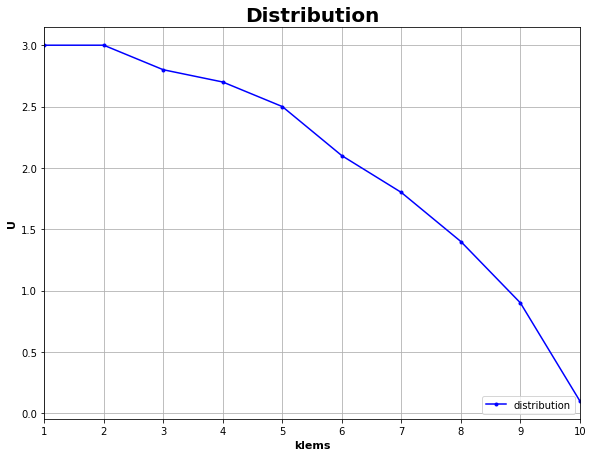

In [89]:
u = np.array([3, 3, 2.8, 2.7, 2.5, 2.1, 1.8, 1.4, 0.9, 0.1])
klem = np.linspace(1, 10, 10)

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(klem, u, color='b', marker='.', label='distribution')

ax.set_title('Distribution', fontsize=20, fontweight='bold')
ax.set_xlabel('klems', fontsize=11, fontweight='bold')
ax.set_xticks(klem)
ax.set_xlim(1, 10)
ax.set_ylabel('U', fontsize=11, fontweight='bold')

ax.legend(loc='lower right')
ax.grid()

plt.show()

$Q = \frac{\omega_r} {\omega_2 - \omega_1} = \frac{2.8}{3.25 - 2.4} = 3.3$

### Шаг №3. Наблюдение запредельных колебаний.

**Распределение напряжения вдоль цепи**:

klem  |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |  9   |  10  
-----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:
U     |  3   |  1.4 |  0.8 |  0.4 |  0.2 |  0.1 |  0.1 |  0.1 |  0.1 |  0.1

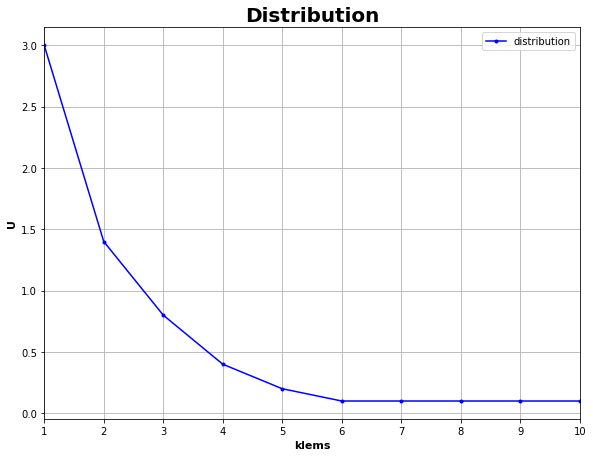

In [97]:
u = np.array([3, 1.4, 0.8, 0.4, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1])
klem = np.linspace(1, 10, 10)

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(klem, u, color='b', marker='.', label='distribution')

ax.set_title('Distribution', fontsize=20, fontweight='bold')
ax.set_xlabel('klems', fontsize=11, fontweight='bold')
ax.set_xticks(klem)
ax.set_xlim(1, 10)
ax.set_ylabel('U', fontsize=11, fontweight='bold')

ax.legend(loc='upper right')
ax.grid()

plt.show()

**Уменьшение напряжения с увеличением частоты**:

$\omega$|  36  |  37  |  38  |  39  |  40  |  41  |  42  |  43  |  44  
-------:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:
U       |  3   |  2   |  1   |  0.6 |  0.4 |  0.3 |  0.2 |  0.2 |  0.1 

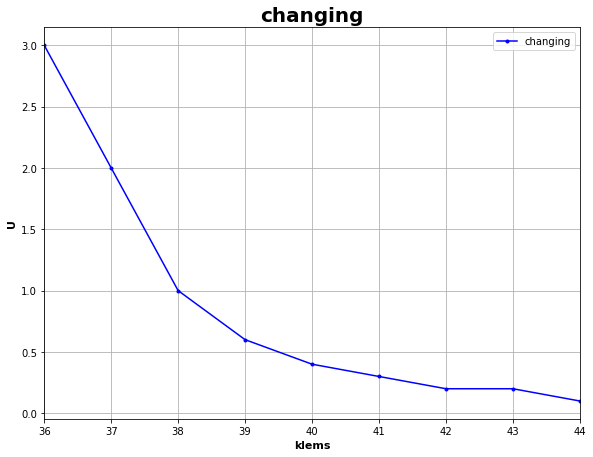

In [102]:
u = np.array([3, 2, 1, 0.6, 0.4, 0.3, 0.2, 0.2, 0.1])
omega = np.linspace(36, 44, 9)

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.plot(omega, u, color='b', marker='.', label='changing')

ax.set_title('changing', fontsize=20, fontweight='bold')
ax.set_xlabel('klems', fontsize=11, fontweight='bold')
ax.set_xticks(omega)
ax.set_xlim(36, 44)
ax.set_ylabel('U', fontsize=11, fontweight='bold')

ax.legend(loc='upper right')
ax.grid()

plt.show()

$\psi = 0.788$